#                         Boozapalooza - Bar and Cocktail Delivery

Authors: Dimitry Belozersky, Theron Glynn

#                                                   Overview

This project will determine whether Boston or Denver are the ideal city for the opening of Boozapalooza - our upscale bar and cocktail delivery service. Using only the Yelp API we are able to draw concrete conclusions about the best place to open our new business.

#                                            Business Problem

Is Boston or Denver the best place to open an upscale bar and cocktail delivery service.
Which city has more total bars?
Which city has more bars that deliver?
Is the ability to deliver reflected in a bar's raiting? 
    - Are bars that deliver rated more highly then ones that don't?
Which city has more bars in a concentrated area?
    - A potential pain point for customers is having to travel to get to a bar.
Which city has more expensive bars to reflect our potential consumers?
    - We are a high-end delivery service so the more expensive bars in a city, the more potential customers we have!

#                                           Data Understanding

We gathered data from Boston and Denver using the Yelp API. By pulling catagories for Zip Code, Buisness Rating, Delivery Availability, Review Count, and Price for Boston and Denver we were able to perform a regressive analasis to determine the best city to open our Delivery Bar. We wanted to break down the total concentraiton of bars by Zip Code and use the Business Ratings and Review Counts to justify our ultimate city decision. In addition we wanted to use Price to determine the amount of potential customers for our high-end bar by finding the areas with the most expensive bars.

In [1]:
# Initial import statements
import requests
import json
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.patches as mpatches

# Boston Data Set

In [2]:
pd.read_csv('Final_Boston_Data.csv')

,Unnamed: 0,id,Name,Zip Code,Buisness Rating,Review Count,Categories,Delivery,Distance,Price,RId,Text,Rating
0,0,u51e3gychuqBYNqe2xG6_w,Lolita Cocina & Tequila Bar Back Bay,2116,4.0,2174,mexican,True,598.504728,$$,wPhaFcmUdvyH9HnbY_AdlA,"Lolita is hot, it's sexy, and it's down with t...",5.0
1,1,u51e3gychuqBYNqe2xG6_w,Lolita Cocina & Tequila Bar Back Bay,2116,4.0,2174,mexican,True,598.504728,$$,GVKIdgGUtgTbcUW2azpv7A,Overpriced but yummy food and drinks. We've ju...,4.0
2,2,u51e3gychuqBYNqe2xG6_w,Lolita Cocina & Tequila Bar Back Bay,2116,4.0,2174,mexican,True,598.504728,$$,xxH-d_kfWO-rHO2QBlaR2Q,Although due to COVID we had to sit outside an...,5.0
3,3,jIxhHWqxKd5ZWBIEmsFxWQ,Citrus & Salt,2116,4.0,556,cocktailbars,True,130.488655,$$,IPj0G8aWi7yXcEgZEJcYoQ,This was a nice little find off the beaten pat...,5.0
4,4,jIxhHWqxKd5ZWBIEmsFxWQ,Citrus & Salt,2116,4.0,556,cocktailbars,True,130.488655,$$,R-q0PKRDozYQKs7iP4IPsQ,I am so glad this place is open for indoor din...,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2437,2437,Bj5UBrE4YSpeojZZGIPeZQ,Il Capriccio,2451,4.0,185,italian,True,14762.690713,$$$,NaN,NaN,NaN
2438,2438,Bj5UBrE4YSpeojZZGIPeZQ,Il Capriccio,2451,4.0,185,italian,True,14762.690713,$$$,NaN,NaN,NaN
2439,2439,0fbJdAPMHQBUGl4aNsg7-Q,Pasta Beach,2110,3.5,274,italian,True,1996.628626,$$,NaN,NaN,NaN
2440,2440,0fbJdAPMHQBUGl4aNsg7-Q,Pasta Beach,2110,3.5,274,italian,True,1996.628626,$$,NaN,NaN,NaN


# Denver Data Set

In [3]:
pd.read_csv('Final_Denver_Data.csv')

,Unnamed: 0,id,Name,Zip Code,Buisness Rating,Review Count,Categories,Delivery,Distance,Price,RId,Text,Rating
0,0,NuVbxkDBwxMuDKe_ok-0LA,54thirty,80202,4.0,259,lounges,True,2239.949871,$$,ElUpForhPlSTDrALAiH0kA,I visited 54thirty on a recent trip and stay a...,5.0
1,1,NuVbxkDBwxMuDKe_ok-0LA,54thirty,80202,4.0,259,lounges,True,2239.949871,$$,YnDl8HmU0eGA7yCNaJnSxg,Come here for drinks and the view\nFont come h...,4.0
2,2,NuVbxkDBwxMuDKe_ok-0LA,54thirty,80202,4.0,259,lounges,True,2239.949871,$$,AoP9BDCBCY8eS0YRCr_i6g,Great chic rooftop bar in downtown Denver. It ...,5.0
3,3,yuzp8qeNTuQBIHzKqYWXPw,Prohibition,80203,4.0,550,newamerican,True,1030.860763,$$,GrBL9xmcNOoLpT83sy_YDQ,A wonderful atmosphere that you don't find at ...,4.0
4,4,yuzp8qeNTuQBIHzKqYWXPw,Prohibition,80203,4.0,550,newamerican,True,1030.860763,$$,NiLyuLN1G5_7KTcLstGsXg,Came here with a group of 13 on a Saturday nig...,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,2920,LIEcfgd6F2UVBqNIMX-fUA,Old Hickory Steakhouse,80019,3.5,26,steak,True,20736.162474,NaN,NaN,NaN,NaN
2921,2921,LIEcfgd6F2UVBqNIMX-fUA,Old Hickory Steakhouse,80019,3.5,26,steak,True,20736.162474,NaN,NaN,NaN,NaN
2922,2922,FyFF1LrJ9vDpBL_i1Gw95Q,Next Door American Eatery - Highlands Ranch,80129,3.5,98,tradamerican,True,20469.943135,$$,NaN,NaN,NaN
2923,2923,FyFF1LrJ9vDpBL_i1Gw95Q,Next Door American Eatery - Highlands Ranch,80129,3.5,98,tradamerican,True,20469.943135,$$,NaN,NaN,NaN


# Data Preperation

Since our initial API call function was able to clean most of the data as we pulled it, we really only needed to use .group_by() and .sort() functions in order to take a look at specific columns and averages.

In [4]:
Denver_data = pd.read_csv('Bars_Denver.csv')
Boston_data = pd.read_csv('Bars_Boston.csv')
Denverft    = Denver_data.groupby(['Delivery'])['Buisness Rating'].mean().loc[False]
Denverrt    = Denver_data.groupby(['Delivery'])['Buisness Rating'].mean().loc[True]
DTF         = [Denverrt,Denverft]

# Data Modeling

For our first graph we wanted to see the average reviews for bars in both cities and if they were related to the ability of those bars to deliver.

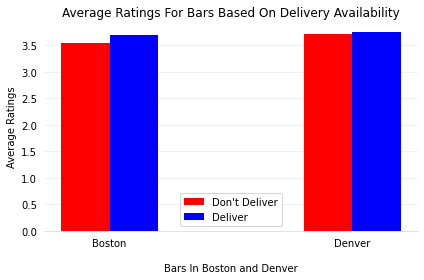

In [5]:
fig, ax   = plt.subplots()
labels    = ['Boston','Denver']
z         = np.arange(len(DTF))
bar_width = .2
rects1    = ax.bar(z,Boston_data.groupby(['Delivery'])['Buisness Rating'].mean(), 
                width = bar_width, label = "Don't Deliver", color ='r')
rects2    = ax.bar(z + bar_width, Denver_data.groupby(['Delivery'])['Buisness Rating'].mean(), 
                width = bar_width, label = 'Deliver', color ='b')
ax.set_ylabel('Average Ratings')
ax.set_title('Average Ratings For Bars Based On Delivery Availability')
ax.set_xticks(z + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
ax.set_xlabel('Bars In Boston and Denver', labelpad=15)
fig.tight_layout()
plt.show()

Even though we were only able to get a small amount of insight from the above graph we still noticed the trend that bars that deliver tend to be rated higher by consumers which helped re-enforce the merits of our business idea.

Next we decided to see if both cities had an even distribution of bars and were pleased to discover that Detriot seemed to concentrate more of their bars into smaller areas.

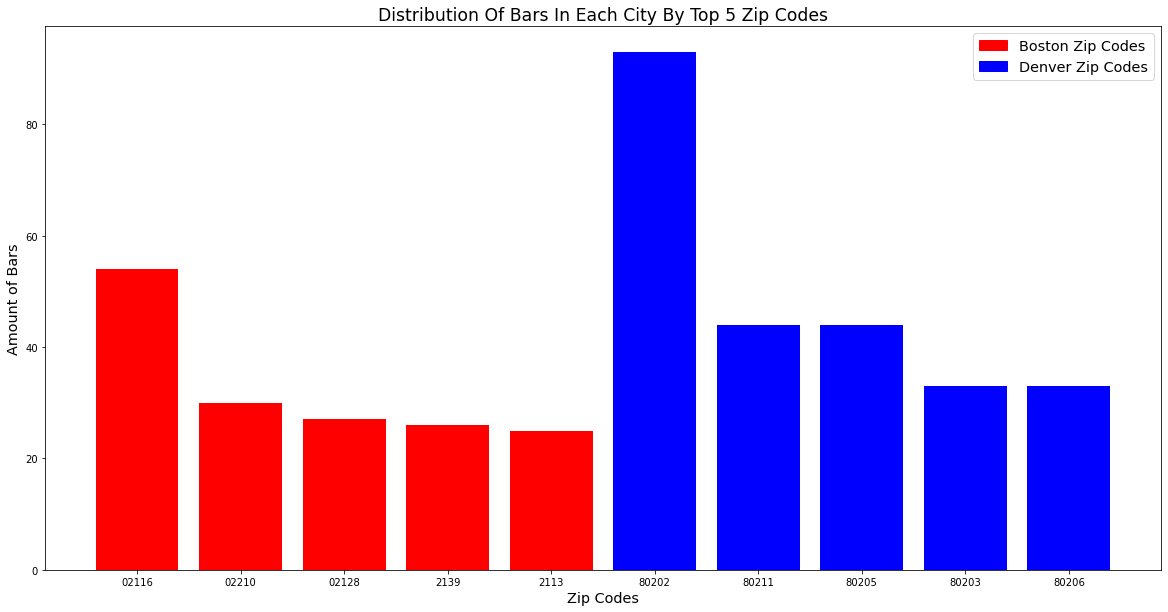

In [6]:
list1      = Boston_data['Zip Code'].value_counts().head().tolist()
list2      = Denver_data['Zip Code'].value_counts().head().tolist()
Amounts    = list1 + list2
fig, ax    = plt.subplots(figsize=(20,10))
my_colors  = list('rrrrrbbbbb')
ax.bar(['02116','02210','02128','2139','2113',
        '80202','80211','80205','80203','80206'],
        Amounts,color=my_colors)
ax.set_ylabel('Amount of Bars', fontsize = 'x-large')
ax.set_xlabel('Zip Codes', fontsize = 'x-large')
ax.set_title('Distribution Of Bars In Each City By Top 5 Zip Codes', fontsize = 'xx-large')
red_patch  = mpatches.Patch(color='red', label = 'Boston Zip Codes')
blue_patch = mpatches.Patch(color='blue', label = 'Denver Zip Codes')
plt.legend(handles=[red_patch,blue_patch],fontsize = 'x-large')
plt.show()

This was our first insight of real value since it showed that Detriot would have a greater potential to expand our consumer base because people in Detroit have to travel to specific areas to find quality cocktails, a service we are ready to provide by coming to them instead.

We wanted to test our theory that the concentration of bars in those top 5 zip codes were catering to our potential afluent and picky customer base. To do that we made a graph representing the relationship between the average of all ratings and the total amount of reviews for the bars in those zip codes.

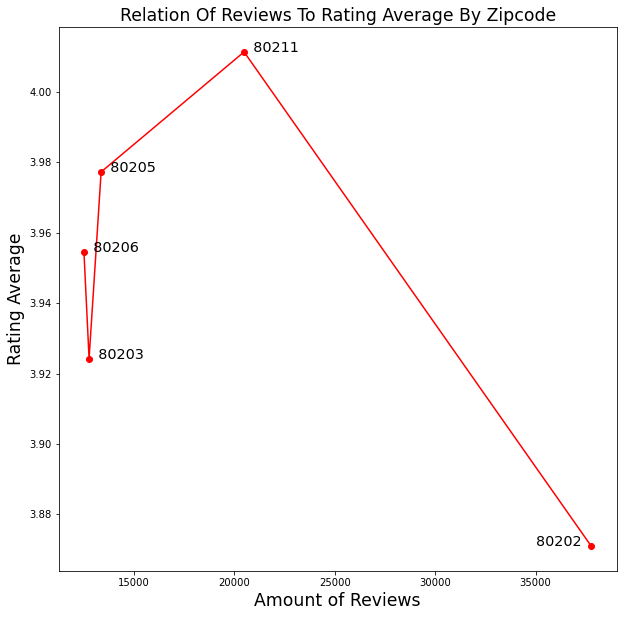

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
y       = [3.870967741935484,
           3.9242424242424243,
           3.977272727272727,
           3.9545454545454546,
           4.011363636363637]
x       = [37774, 12758, 13359, 12502, 20480]
x,y     = zip(*sorted(zip(x,y)))

ax.annotate('  80206',(x[0],y[0]),ha = 'left',fontsize  = 'x-large')
ax.annotate('  80203',(x[1],y[1]),ha = 'left',fontsize  = 'x-large')
ax.annotate('  80205',(x[2],y[2]),ha = 'left',fontsize  = 'x-large')
ax.annotate('  80211',(x[3],y[3]),ha = 'left',fontsize  = 'x-large')
ax.annotate('80202  ',(x[4],y[4]),ha = 'right',fontsize = 'x-large')
ax.plot(x,y,marker='o',color='r')

ax.set_xlabel('Amount of Reviews',fontsize = 'xx-large')
ax.set_ylabel('Rating Average',fontsize = 'xx-large')
ax.set_title('Relation Of Reviews To Rating Average By Zipcode',fontsize = 'xx-large')
plt.show()

We found that the zipcode with largest amount of bars had the lowest average ratings. This shows us that even in the most crowded space we have room to grow due to our quality products. 

Finally we wanted to see a breakdown of categories within the bar space to get insight on potential ways in which we can differentiate ourselves from the competition.

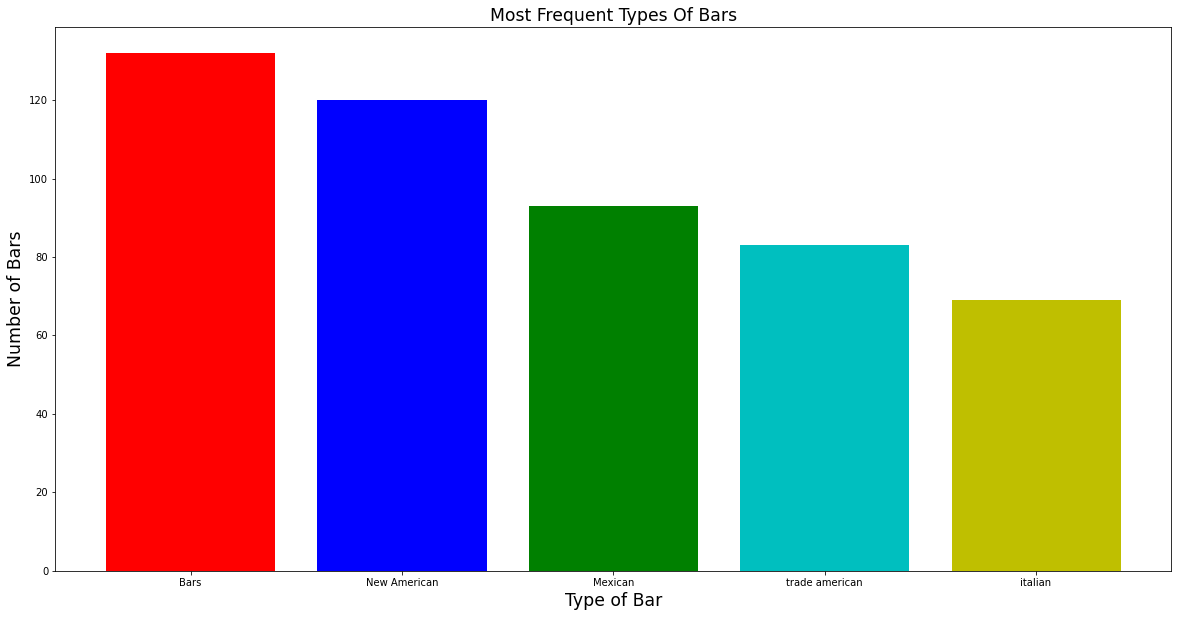

In [8]:
Denver_data.groupby('Categories')['Zip Code'].count().nlargest()
fig, ax   = plt.subplots(figsize=(20,10))
my_colors = list('rbgcy')

ax.bar(['Bars','New American','Mexican','trade american','italian',], 
       Denver_data.groupby('Categories')['Zip Code'].count().nlargest(),color=my_colors)
ax.set_ylabel('Number of Bars', fontsize = 'xx-large')
ax.set_xlabel('Type of Bar',fontsize = 'xx-large')
ax.set_title('Most Frequent Types Of Bars',fontsize = 'xx-large')
plt.show()

We found that while the biggest category was Bars, the rest of the most frequant categories were mostly related to restaurants and food. Building on this knowledge we are able to draw the conclusion that by using cocktails and cocktail delivery as our categories we would stand out from our competition as well as make it easy to find us if the consumer searches for those terms.

#                                       Evaluation and Conclusion

After some initial trepidation about our ability to draw real insights from such a limited data set we were pleasntly surprised at how much we were able to gather about our potential future business site. 

We determined not only the city that we want to start our business in but were able to narrow it down to a few potential zip codes.

Given more time it would be great to bring in Census data in order to further narrow down our ideal neighborhood based on income level to have a fuller picture of our potential consumer base.